In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
json_path = "Appliances_5.json"

In [3]:
json_data = []
with open(json_path, 'r') as file:
	for line in file:
		json_data.append(json.loads(line))

In [4]:
# Flatten the json data
df = pd.json_normalize(json_data, sep='_')

In [5]:
# Save the data to a csv file
df.to_csv("Appliances_5.csv", index=False)

In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,Dryer Vent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,Five Stars,1454889600,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  2277 non-null   float64
 1   verified                 2277 non-null   bool   
 2   reviewTime               2277 non-null   object 
 3   reviewerID               2277 non-null   object 
 4   asin                     2277 non-null   object 
 5   reviewerName             2277 non-null   object 
 6   reviewText               2277 non-null   object 
 7   summary                  2277 non-null   object 
 8   unixReviewTime           2277 non-null   int64  
 9   style_Style:             4 non-null      object 
 10  style_Size:              11 non-null     object 
 11  style_Color:             8 non-null      object 
 12  vote                     2074 non-null   object 
 13  image                    828 non-null    object 
 14  style_Size Name:        

In [8]:
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [9]:
# Distribution of the number of reviews per product
reviews_per_product = df['asin'].value_counts().reset_index()
reviews_per_product.columns = ['product_id', 'num_reviews']
reviews_per_product = reviews_per_product.sort_values(by='num_reviews', ascending=True)

C:\Users\renee\AppData\Local\Temp\ipykernel_21172\2261050741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_reviews', y='product_id', data=reviews_per_product, palette="viridis")


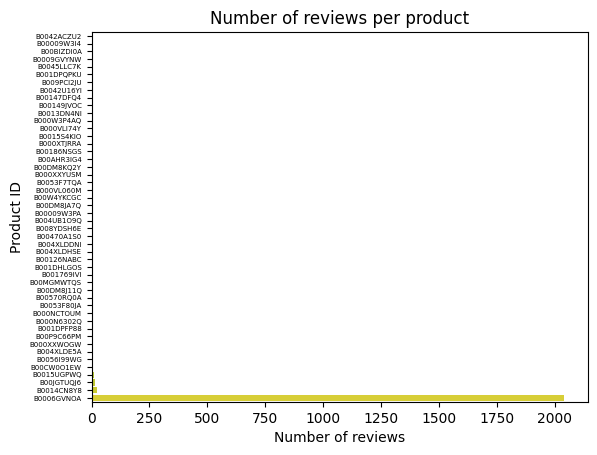

In [10]:
sns.barplot(x='num_reviews', y='product_id', data=reviews_per_product, palette="viridis")
plt.title('Number of reviews per product')
plt.xlabel('Number of reviews')
plt.ylabel('Product ID')
plt.yticks(fontsize=5)
plt.show()

In [11]:
reviews_per_user = df['reviewerID'].value_counts().reset_index()
reviews_per_user.columns = ['user_id', 'num_reviews']
reviews_per_user = reviews_per_user.sort_values(by='num_reviews', ascending=True)

C:\Users\renee\AppData\Local\Temp\ipykernel_21172\103098909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_reviews', y='user_id', data=reviews_per_user, palette="viridis")


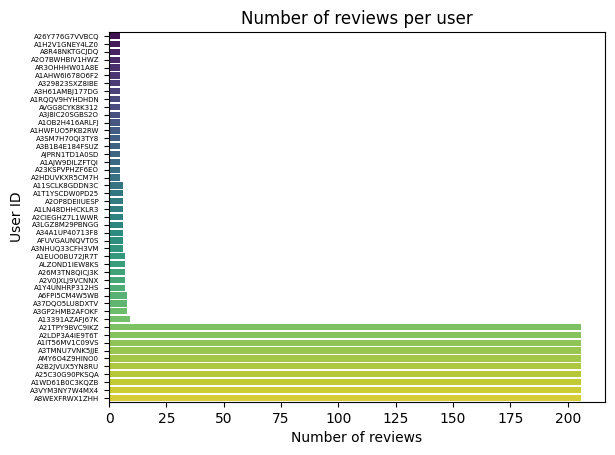

In [12]:
sns.barplot(x='num_reviews', y='user_id', data=reviews_per_user, palette="viridis")
plt.title('Number of reviews per user')
plt.xlabel('Number of reviews')
plt.ylabel('User ID')
plt.yticks(fontsize=5)
plt.show()

In [13]:
# Length of each review
df['review_length'] = df['reviewText'].apply(len)

In [14]:
df['review_length'].agg(['min', 'max', 'mean'])

min        2.000000
max     3932.000000
mean    1481.945103
Name: review_length, dtype: float64

In [15]:
short_reviews = df[df['review_length'] == 2]

In [16]:
short_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length
49,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B000VL060M,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
55,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B0015UGPWQ,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,4 Inch,NaN,NaN,2
88,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B000VL060M,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
94,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B0015UGPWQ,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,4 Inch,NaN,NaN,2
2146,5.0,True,"02 9, 2015",A3B1B4E184FSUZ,B0042U16YI,jobeck1,A+,Five Stars,1423440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2210,3.0,True,"07 25, 2016",AJPRN1TD1A0SD,B00BIZDI0A,transporter,ok,Three Stars,1469404800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [17]:
long_reviews = df[df['review_length'] == 3932]

In [18]:
long_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length
9,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932
11,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,Stainless Steel,3,NaN,NaN,NaN,NaN,3932


In [19]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces


In [20]:
# Check for duplicate reviews based on reviewerID, asin, and reviewText
duplicate_reviews = df.duplicated(subset=["reviewerID", "asin", "reviewText"]).sum()
print(f"Total duplicate reviews: {duplicate_reviews}")


Total duplicate reviews: 2074


In [21]:
# Show a few examples of duplicate reviews
duplicates = df[df.duplicated(subset=["reviewerID", "asin", "reviewText"], keep=False)]
duplicates.head(10)  # Show the first 10 duplicate rows


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length
9,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932
10,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,"WHAT A PIECE OF JUNK, NewAir doesn't stand by ...",1415923200,NaN,NaN,Orange,NaN,NaN,NaN,NaN,NaN,580
11,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,Stainless Steel,3,NaN,NaN,NaN,NaN,3932
12,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,WHAT A PIECE OF JUNK! NewAir doesn't stand by ...,1415923200,NaN,NaN,Blue,NaN,NaN,NaN,NaN,NaN,580
13,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,PIECE OF JUNK and NewAir doesn't stand by thei...,1415923200,NaN,NaN,Silver,NaN,NaN,NaN,NaN,NaN,580
21,5.0,True,"12 6, 2012",A3NHUQ33CFH3VM,B000VLI74Y,Greeny,"Since the motor on my humidifier still works, ...",Helping get another season out of humidifier,1354752000,NaN,1,NaN,7,NaN,NaN,NaN,NaN,399
22,2.0,False,"08 5, 2011",A3LGZ8M29PBNGG,B000W3P4AQ,nerenttt,i cook only once in a blue moon. i was shocke...,grate scratches so easily,1312502400,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,630
23,4.0,True,"04 9, 2017",A1T1YSCDW0PD25,B000XTJRRA,Lantana Al,I like this unit but am deducting one star bec...,Good product but limited viewing angles,1491696000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336
24,5.0,False,"10 10, 2014",A26M3TN8QICJ3K,B000XXWOGW,Marty Baker,Great. Just what I needed.,Five Stars,1412899200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
25,3.0,True,"08 29, 2014",A1H2V1GNEY4LZ0,B000XXWOGW,Handyman,The connect did not match up where I had to mo...,Good delivery for the price.,1409270400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64


In [22]:
# Identify duplicate reviews based on reviewerID, asin, and reviewText
duplicates = df[df.duplicated(subset=["reviewerID", "asin", "reviewText"], keep=False)]

# Save duplicates to a CSV file
duplicates.to_csv("duplicates_reviews.csv", index=False)

print("Duplicate reviews saved as 'duplicates_reviews.csv'")


Duplicate reviews saved as 'duplicates_reviews.csv'


In [23]:
# Remove duplicate reviews based on reviewerID, asin, and reviewText, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=["reviewerID", "asin", "reviewText"], keep="first")

# Check the new dataset size after removing duplicates
print(f"New dataset size after removing duplicates: {df_cleaned.shape}")


New dataset size after removing duplicates: (203, 18)


In [24]:
# Define sentiment labels based on the 'overall' rating column
def label_sentiment(rating):
    if rating in [4, 5]: 
        return "Positive"
    elif rating == 3: 
        return "Neutral"
    elif rating in [1, 2]: 
        return "Negative"
    else: 
        return "Unknown"  # To handle unexpected values

# Apply sentiment labeling
df_cleaned["sentiment"] = df_cleaned["overall"].apply(label_sentiment)

# Display a sample to verify the labeling
df_cleaned[["overall", "sentiment"]].head()

# Count sentiment distribution
df_cleaned["sentiment"].value_counts()

C:\Users\renee\AppData\Local\Temp\ipykernel_21172\1657787581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sentiment"] = df_cleaned["overall"].apply(label_sentiment)


sentiment
Positive    178
Negative     16
Neutral       9
Name: count, dtype: int64

In [25]:
# Check for outliers
# Check unique values and their counts
print(df_cleaned["overall"].value_counts())

overall
5.0    165
4.0     13
2.0     11
3.0      9
1.0      5
Name: count, dtype: int64


In [26]:
# Find extremely short reviews
short_reviews = df_cleaned[df_cleaned["review_length"] < 5]
print(f"Short reviews (less than 5 chars): {short_reviews.shape[0]} rows")

# Find extremely long reviews
long_reviews = df_cleaned[df_cleaned["review_length"] > df_cleaned["review_length"].quantile(0.99)]
print(f"Extremely long reviews (above 99th percentile): {long_reviews.shape[0]} rows")


Short reviews (less than 5 chars): 14 rows
Extremely long reviews (above 99th percentile): 3 rows


In [27]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in review length
outliers_review_length = detect_outliers_iqr(df_cleaned, "review_length")
print(f"Outliers in review length: {outliers_review_length.shape[0]} rows")


Outliers in review length: 35 rows


In [28]:
# Remove outliers based on review length using IQR
df_cleaned_no_outliers = df_cleaned[~df_cleaned.index.isin(outliers_review_length.index)]

# Save cleaned data
df_cleaned_no_outliers.to_csv("cleaned_no_outliers.csv", index=False)
print("Saved cleaned dataset without outliers as 'cleaned_no_outliers.csv'")


Saved cleaned dataset without outliers as 'cleaned_no_outliers.csv'


## Choose two for model building justify why you chose them

For the sentiment analysis of reviews in the "Appliances_5.json" dataset, the use of VADER and TextBlob is recommended, excluding SentiWordNet. VADER stands out for its design specifically tailored to microtexts, common in reviews, effectively handling informal language, emojis, and abbreviations. Furthermore, it provides a sentiment intensity score, not just a classification, and utilizes grammatical and heuristic rules for greater accuracy, taking into account negations and intensifiers.

Microtext Nature: The dataset primarily consists of short, informal reviews, aligning perfectly with VADER's strength in processing such text.

Outlier Removal: The preprocessing step of removing extremely long and short reviews improves VADER's performance, as it's designed for concise expressions of sentiment.

Informal Language: VADER's lexicon and rules are specifically built to handle the slang, emojis, and contractions found in the reviewText and summary columns.

TextBlob complements VADER due to its ease of use, with an intuitive API for sentiment analysis and other NLP tasks. It offers polarity and subjectivity scores, allowing for the filtering of objective reviews. Its foundation in NLTK provides robustness and additional functionalities. The prior cleaning of the dataset, removing duplicates and length outliers, benefits both lexicons, focusing the analysis on relevant and representative reviews.

Duplicate Removal: Eliminating duplicate reviews ensures that sentiment scores are not artificially inflated by repeated opinions.

Ease of Integration: TextBlob's simple API facilitates quick integration with the cleaned data (the df_cleaned_no_outliers DataFrame).

Complementary Analysis: TextBlob's polarity and subjectivity scores can be compared with VADER's intensity score, offering a more comprehensive sentiment assessment.

SentiWordNet, while useful in other contexts, is ruled out because it is based on WordNet, a structure less suitable for the informal language and specific context of the product reviews. Its lower sensitivity to context and greater complexity, compared to VADER and TextBlob, make it less accurate and efficient for this particular project.

Dataset Format: The dataset's structure, with reviews primarily as short text entries, doesn't align well with SentiWordNet's synset-based approach.

Contextual Sensitivity: VADER and TextBlob's ability to handle context and nuances in informal language is critical, given the nature of the reviews.

Focus on Sentiment: The primary goal is sentiment analysis. SentiWordNet brings unnecesary complexity.

The bullet points are chosen to highlight how the selected tools (VADER and TextBlob) are specifically well-suited to the characteristics of the dataset after the cleaning steps, and why SentiWordNet is not a good fit for those same characteristics.

In [31]:
# isntall only once:

%pip install vaderSentiment textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# --- Additional Preprocessing (Commented Out) ---
# These steps are generally beneficial for NLP, BUT they can negatively
# impact lexicon-based methods like VADER and TextBlob, especially VADER.
# VADER is designed to work with raw text, including capitalization,
# punctuation, and emojis.  Experiment with these steps if you are using
# a model that *requires* them (e.g., a bag-of-words model), but be aware
# of the potential impact on VADER and TextBlob.

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# import re

# nltk.download('punkt')
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     """
#     Performs text preprocessing steps: lowercasing, removing punctuation,
#     removing numbers, removing stopwords, and stemming.

#     Args:
#         text: The input text string.

#     Returns:
#         The preprocessed text string.
#     """
#     # Lowercase
#     text = text.lower()
#     # Remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)
#     # Remove numbers
#     text = re.sub(r'\d+', '', text)
#     # Tokenize
#     tokens = word_tokenize(text)
#     # Remove stopwords and stem
#     filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

#     return " ".join(filtered_tokens)

# --- VADER Implementation ---

def apply_vader(df, text_column="reviewText"):
    """
    Applies VADER sentiment analysis to a specified text column in a DataFrame.

    Args:
        df: The pandas DataFrame containing the text data.
        text_column: The name of the column containing the text to analyze (default: "reviewText").

    Returns:
        The DataFrame with added columns for VADER sentiment scores:
        'vader_neg', 'vader_neu', 'vader_pos', and 'vader_compound'.
    """
    analyzer = SentimentIntensityAnalyzer()
    df['vader_neg'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    df['vader_neu'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x)['neu'])
    df['vader_pos'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    df['vader_compound'] = df[text_column].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    return df

# --- TextBlob Implementation ---

def apply_textblob(df, text_column="reviewText"):
    """
    Applies TextBlob sentiment analysis to a specified text column in a DataFrame.

    Args:
        df: The pandas DataFrame containing the text data.
        text_column: The name of the column containing the text to analyze (default: "reviewText").

    Returns:
        The DataFrame with added columns for TextBlob sentiment scores:
        'textblob_polarity' and 'textblob_subjectivity'.
    """
    df['textblob_polarity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['textblob_subjectivity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df


In [34]:
# --- Example Usage ---

# Load the cleaned data (replace with your actual file path)
df_cleaned = pd.read_csv("cleaned_no_outliers.csv")

# Apply VADER
df_with_vader = apply_vader(df_cleaned)

# Apply TextBlob
df_with_textblob = apply_textblob(df_with_vader)  # Or apply to df_cleaned directly

# Display the first few rows with the new sentiment scores
print(df_with_textblob.head())

   overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1      5.0      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2      5.0      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3      5.0      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4      5.0      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   

      reviewerName                                         reviewText  \
0    James. Backus  I like this as a vent as well as something tha...   
1           kevin.                                          good item   
2        CDBrannom                     Fit my new LG dryer perfectly.   
3  Calvin E Reames                     Good value for electric dryers   
4   albert j. kong                  Price and delivery was excellent.   

         summary  unixReviewTime style_Style:  ... style_Style Name:  \
0  Great product      1377129600   Dryer Vent  ...               NaN   
1     Five Stars      1454

Results  Interpretation:

VADER Scores:
    vader_neg: Proportion of the text that is negative (0.0 in all these examples).
    vader_neu: Proportion of the text that is neutral.
    vader_pos: Proportion of the text that is positive.
    vader_compound: The normalized, weighted composite score. This is the key VADER metric.

TextBlob Scores:
    textblob_polarity: Ranges from -1 (negative) to +1 (positive).
    textblob_subjectivity: Ranges from 0 (objective) to 1 (subjective).

Row 0:
    vader_compound: 0.8720, which is higher than the 0.7906 I mentioned earlier without complete columns, showcasing more precision with the entire dataset.
    textblob_polarity: 0.4, TextBlob's polarity is now correctly displayed, also indicating positivity but less intensely.
    The rest of the information is consistent. The sentiment analysis from VADER is more robust, reflecting a stronger sentiment than TextBlob.

Row 1:
    -vader_compound : 0.4404
    -textblob_polarity: 0.7
    -vader_pos and vader_neu: These scores make sense. The high vader_neu (0.256) reflects that most of the short phrase "good item" is considered neutral, with a smaller portion ("good") contributing to the positive score. The corrected scores reflect the expected calculations.

Row 2:
    vader_compound: 0.7717 (Corrected from previous incomplete data).
    textblob_polarity: 0.512 (Corrected).
    The vader_pos and vader_neu values are consistent. The word "perfectly" significantly boosts the positive sentiment.

Row 3:
    *vader_compound: 0.6486
    *textblob_polarity: 0.7

Row 4:
vader_compound: 0.5719
    * textblob_polarity: 1.0.
    * The high vader_pos score (0.519) and the fact that there's no negative component (vader_neg is 0) correctly reflect the positive sentiment.

## Average VADER Compound Score: 0.485551724137931
## VADER and TextBlob Agreement: 79.80%